# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
#%load_ext nb_black

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount =True)

Mounted at /content/drive


In [ ]:
path=('/content/drive/MyDrive/Pandas1/Project3/used_device_data.csv')
udd=pd.read_csv(path)

## Data Overview

- Observations
- Sanity checks

In [ ]:
udd.shape

(3454, 15)

In [ ]:
udd.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


In [ ]:
udd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Observation

- The data contains 4 categorical variables and 11 numerical variables

In [ ]:
udd.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


#### Observations

- Brand name, OS, 4g and 5g contains 34, 4, 2 and 2 unique items respectively
- On average normalized used price for devices is 4.364712 usd, while normalized new price is 5.233 usd
- Used device cost ranges from 1.536867 usd to 6.619433 usd, while new device price ranges from 2.901422 usd to 7.847841 usd

In [ ]:
udd.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Observations

- Main camera column is missing 179 values

- Selfie Camera is missing 2 values

- Internal memory is missing 4 values

- Ram is missing 4 values

- Battery is missing 6 values

- Weight is missing 7 values

In [ ]:
udd.duplicated().sum()

0

- No duplicates in the data

In [ ]:
udd1=udd.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

###Univariate Analysis

In [ ]:
#from pandas.io.parsers.python_parser import FilePathOrBuffer
from seaborn.distributions import histplot
def histogram_boxplot(data, feature, figsize=(15,10), kde=False, bins=None):
  f2, (ax_box2, ax_hist2)=plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios':(0.25, 0.75)},figsize=figsize,)
  sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color='violet')
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,
  )if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
  ax_hist2.axvline(data[feature].mean(), color='green', linestyle='--')
  ax_hist2.axvline(data[feature].median(), color='black', linestyle='-')

####Screen size

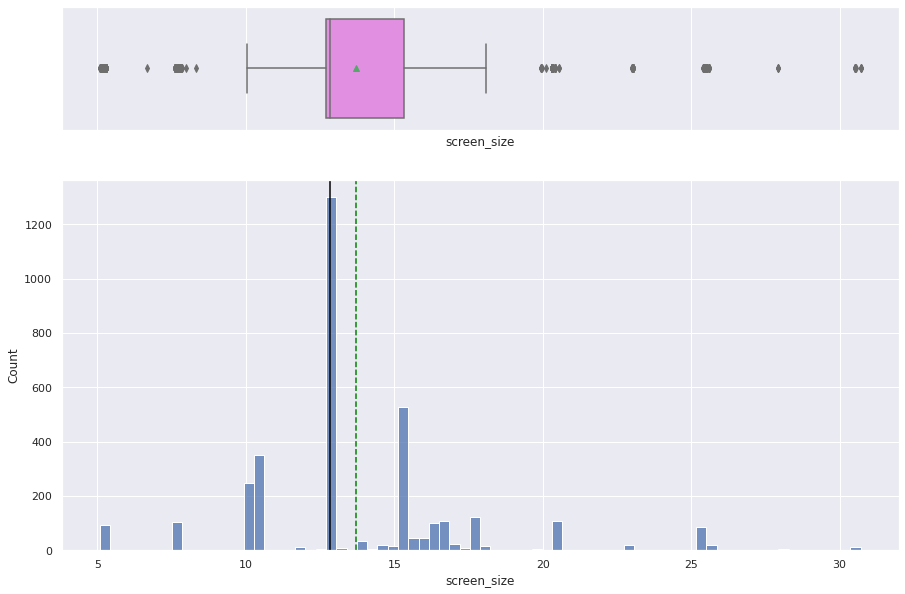

In [ ]:
histogram_boxplot(data=udd1, feature='screen_size')

#### Observations

- The distribution of the screen size is not normal
- the mean and median are not equal
- the distribution skewed to the right, also there are outliers at both ends

####Main camera mp

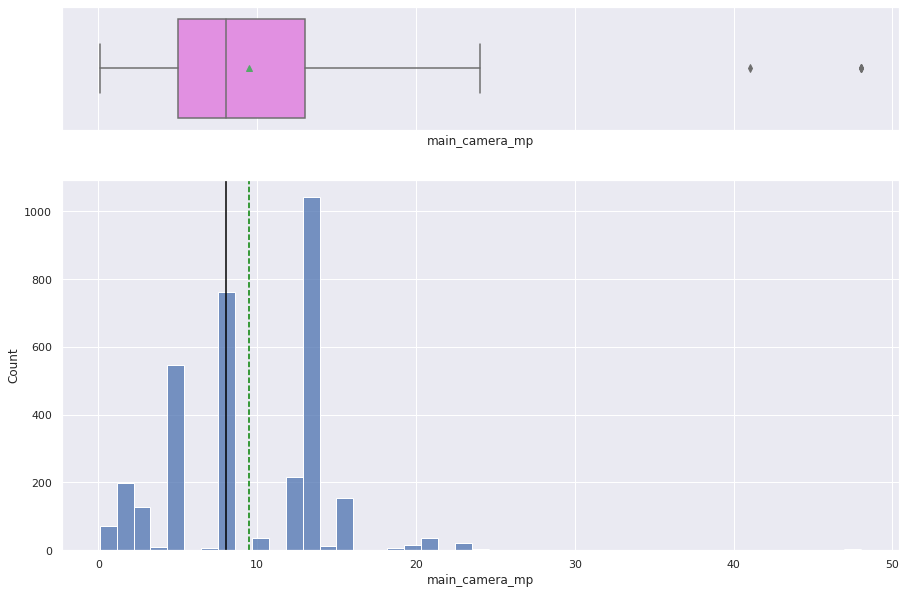

In [ ]:
histogram_boxplot(udd1, 'main_camera_mp')

#### Observations

- The distribution of the main camera is not normal
- the mean and median are not equal
- the distribution looks slightly skewed to the right, also there are outliers at the upper end

####Selfie camera mp

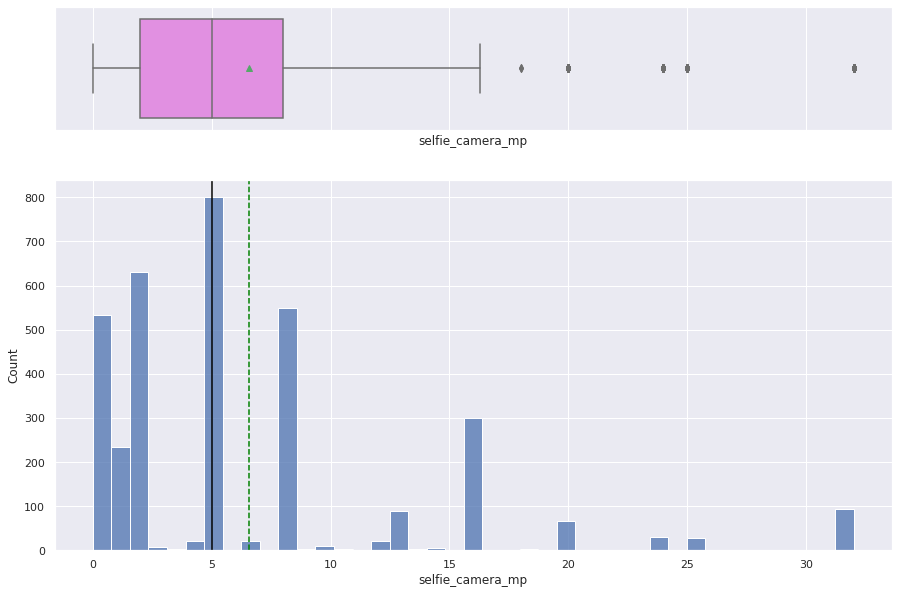

In [ ]:
histogram_boxplot(udd1, 'selfie_camera_mp')

#### Observations

- The distribution of the selfie camera is not normal
- the mean and median are not equal
- the distribution looks slightly skewed to the right, also there are outliers at the upper end

####Internal memory

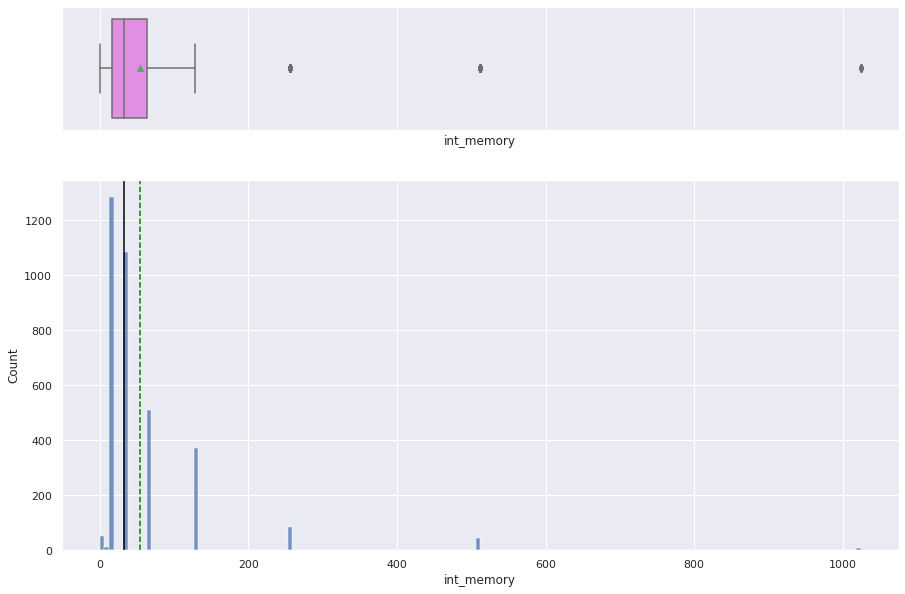

In [ ]:
histogram_boxplot(udd1, 'int_memory')

#### Observations

- The distribution of the internal memory is not normal
- the mean and median are not equal
- the distribution look skewed to the right, also there are outliers at the upper end

####Ram

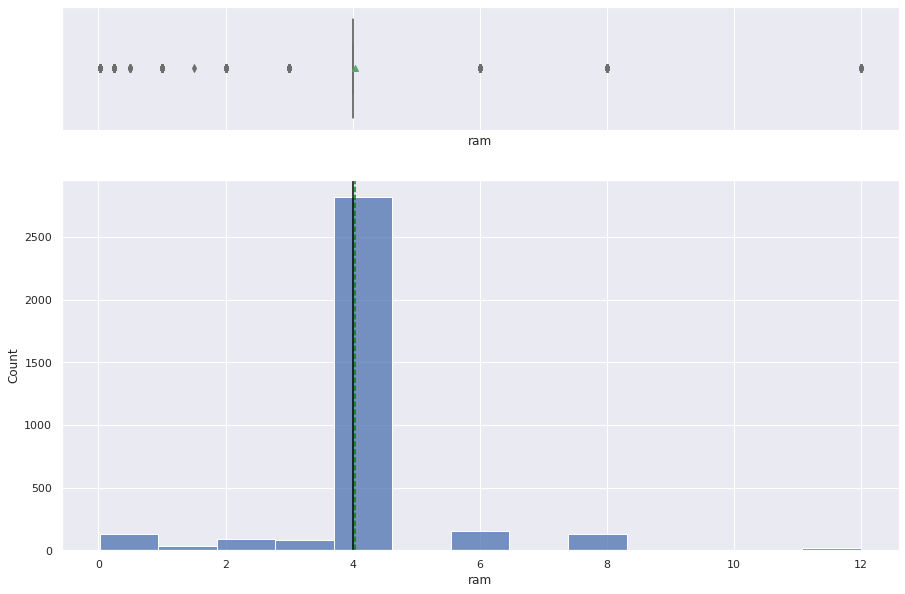

In [ ]:
histogram_boxplot(udd1, 'ram')

#### Observations

- The distribution of the ram is not normal
- the mean and median are equal
- the distribution shows no skewness, there are outliers on both sides

####Battery

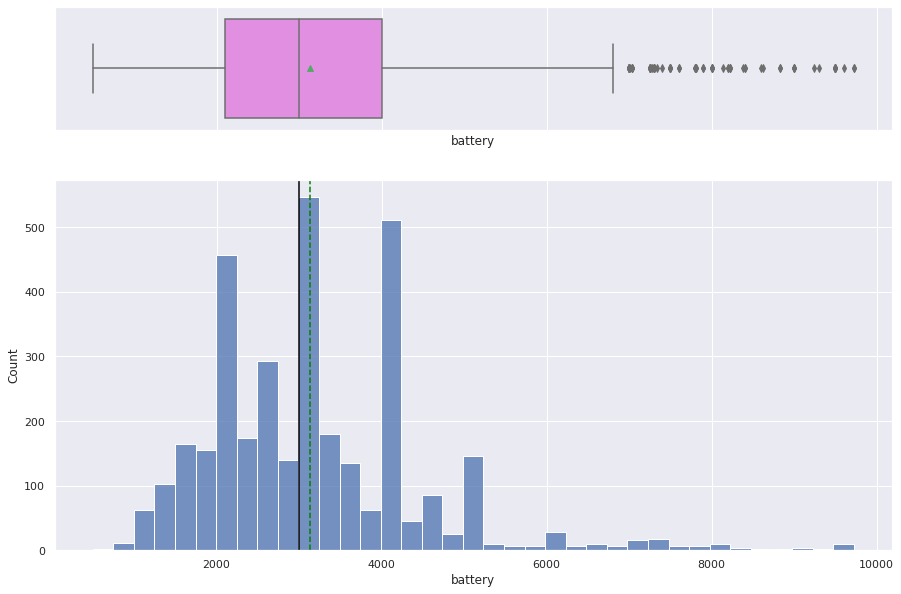

In [ ]:
histogram_boxplot(udd1, 'battery')

#### Observations

- The distribution of the battery is not normal
- the mean and median are not equal but close to each other
- the distribution looks slightly skewed to the right, also there are outliers at the higher end

####Weight

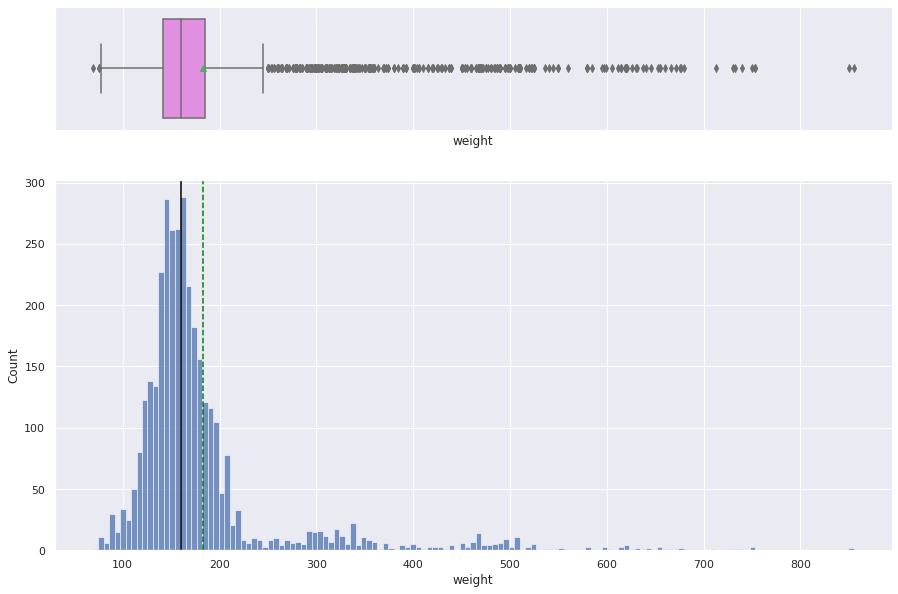

In [ ]:
histogram_boxplot(udd1, 'weight')

#### Observations

- The distribution of weight looks normal at one end
- the mean and median are not equal  
- the distribution is skewed to the right, also there are more outliers at the higher end and few at the lower end

####Release year

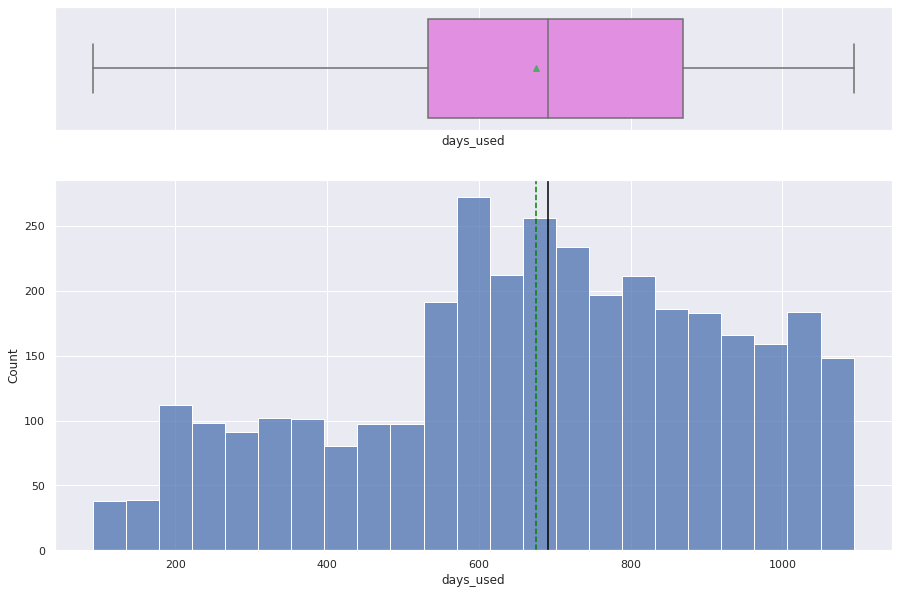

In [ ]:
histogram_boxplot(udd1, 'days_used')

#### Observations

- The distribution of the release year is not normal
- the mean and median are not equal but close to each other
- the distribution looks slightly skewed to the left, also there are no outliers

####Normalized new price

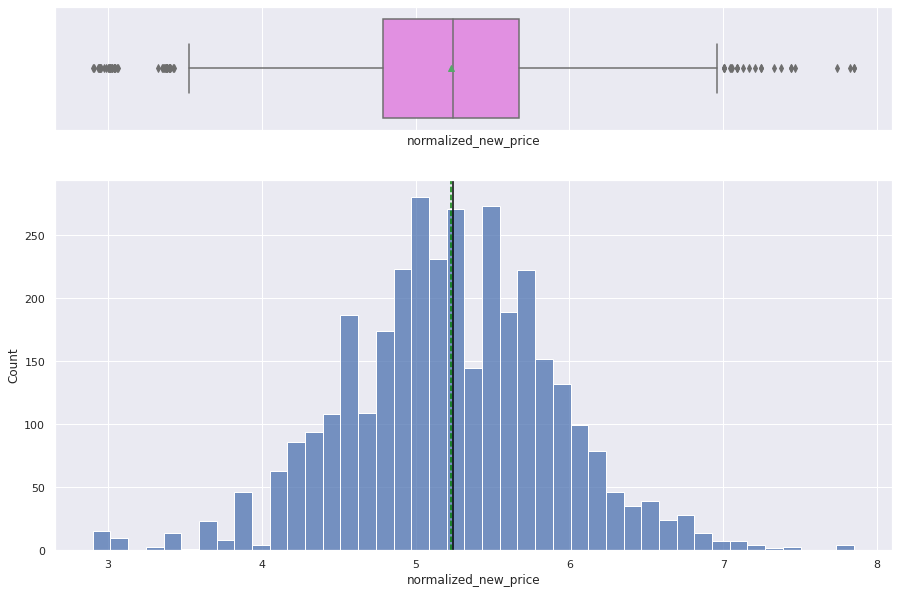

In [ ]:
histogram_boxplot(udd1, 'normalized_new_price')

#### Observations

- The distribution of the normalized new price look slightly normal
- the mean and median are fairly equal
- the distribution hardly show skewness, there are outliers on both sides

####Normalized used price

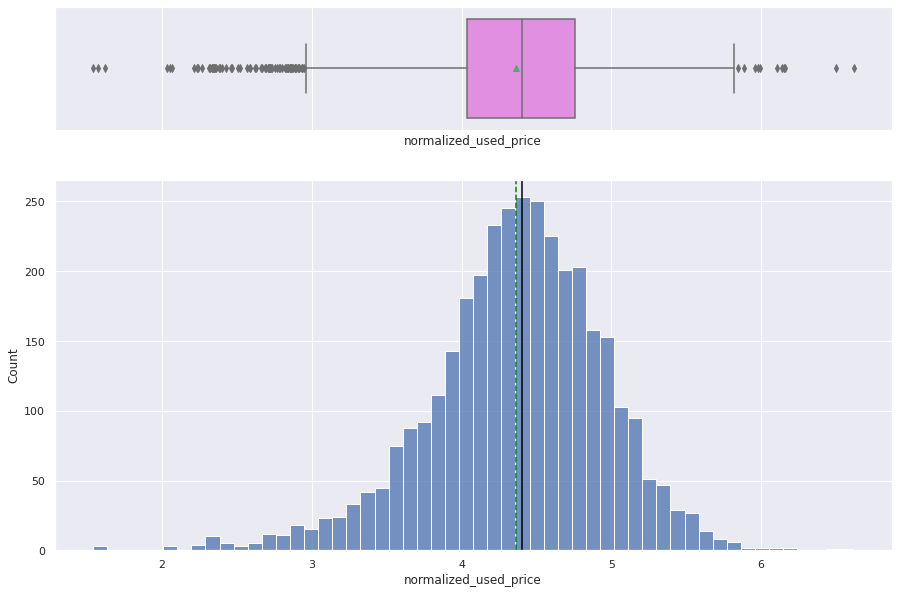

In [ ]:
histogram_boxplot(udd1, 'normalized_used_price')

#### Observations

- The distribution of the normalized used price is slightly normal
- the mean and median are not equal but very close to each other
- the distribution hardly show skewness, there are outliers on both sides

In [ ]:
from pandas._libs.lib import to_object_array_tuples
def labeled_barplot(data, feature, perc=False, n=None):
  """
  data is dataframe
  feature is dataframe column
  perc is whether to display percentages instead of count
  n is to display the top n category levels
  """
  total=len(data[feature])
  count=data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count+2, 6))
  else:
    plt.figure(figsize=(n +2, 6))

  plt.xticks(rotation=90, fontsize=15)
  ax=sns.countplot(data=data, x=feature, palette='Paired', order=data[feature].value_counts().index[:n],)
  for p in ax.patches:
    if perc== True:
      label='{:.1f}%'.format(100*p.get_height()/total)
    else:
      label=p.get_height()

    x=p.get_x() +p.get_width()/2
    y=p.get_height()
    ax.annotate(label, (x,y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

  plt.show()

####Release year

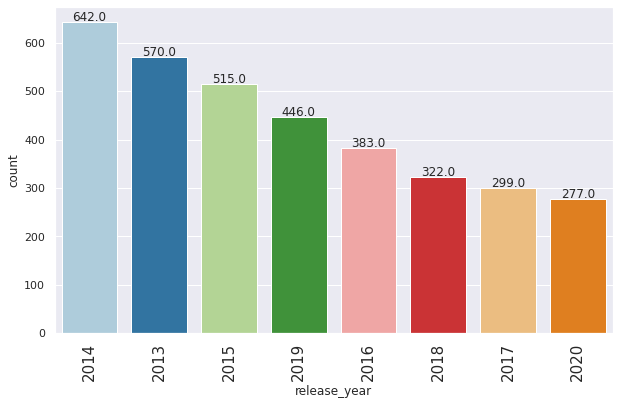

In [ ]:
labeled_barplot(udd1, 'release_year')

#### Observations

- most devices were released in 2014, followed by 2013, 2015, 2019, 2018, 2017 and 2020

####Brand name

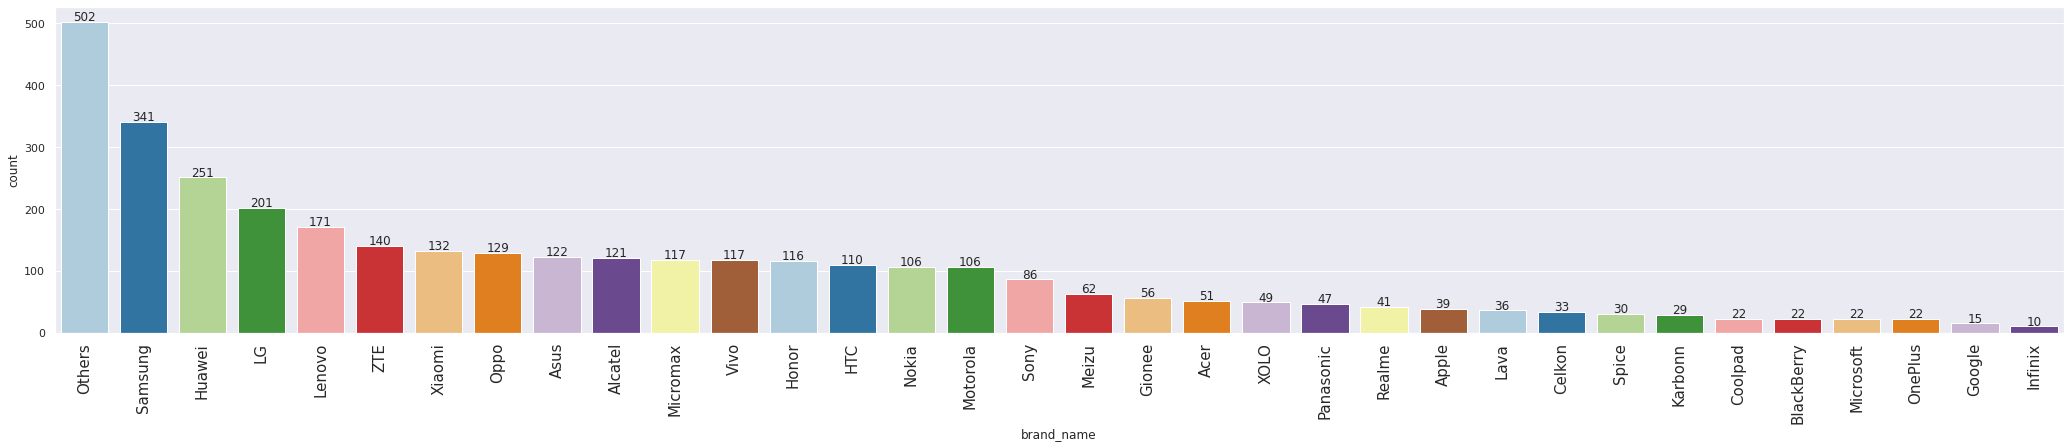

In [ ]:
labeled_barplot(udd1, 'brand_name')

#### Observations

- Sumsung, Huawei and LG are the top 3 brands that was traded

####Os

In [ ]:
uddlscreen = udd1[udd1.screen_size > 6 * 2.54]
uddlscreen.shape

(1099, 15)

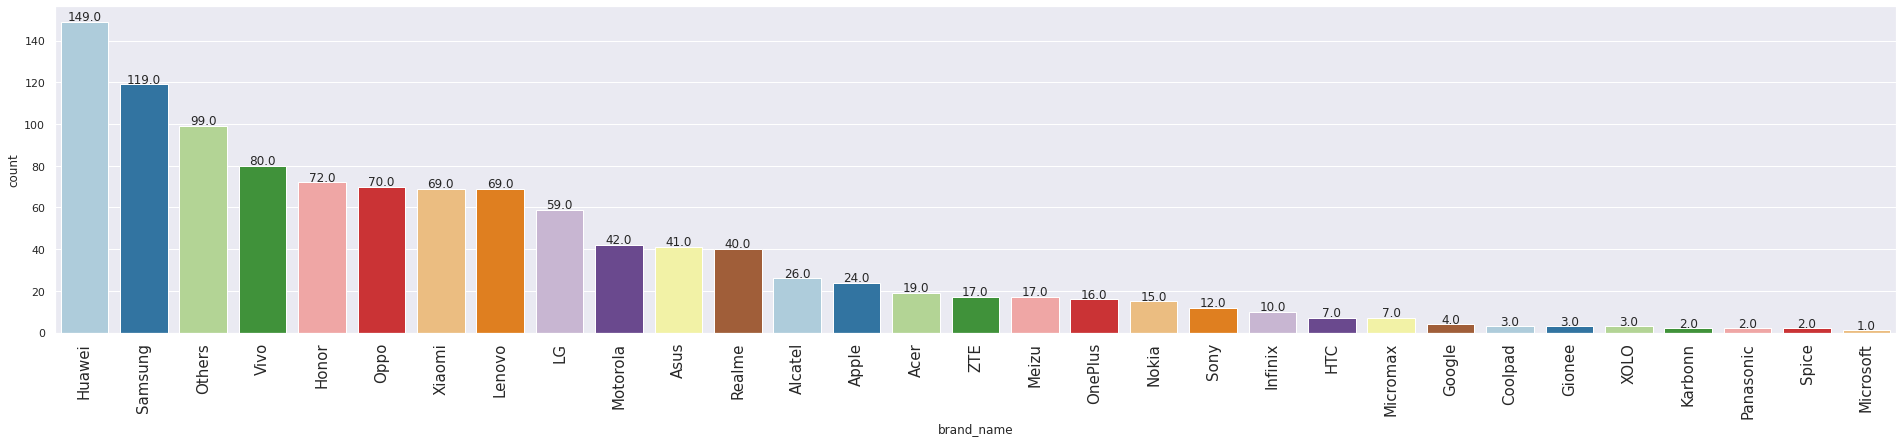

In [ ]:
labeled_barplot(uddlscreen, 'brand_name')

#### Observations

- Huawei, Sumsungand Vivo are the top three devices with higer screen size

In [ ]:
selfiecam = udd1[udd1.selfie_camera_mp > 8]
selfiecam.shape

(655, 15)

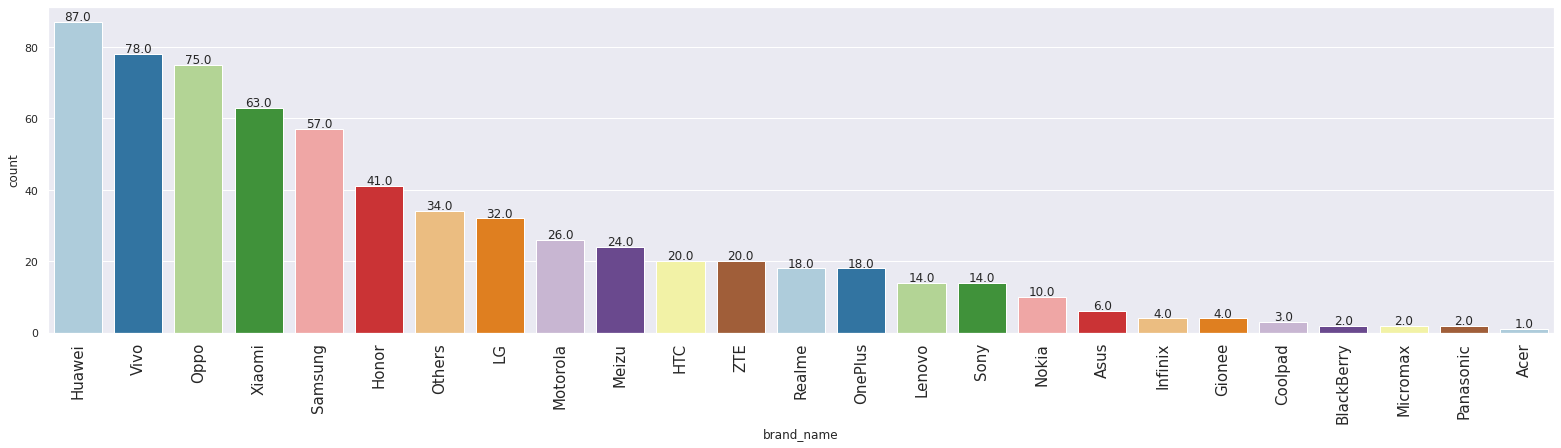

In [ ]:
labeled_barplot(selfiecam, 'brand_name')

####Observations

- Huawei, Vivo, oppo, Xiaomi and Sumsung are the top five brands with highest number of devices with selfie camera greater than 8mp

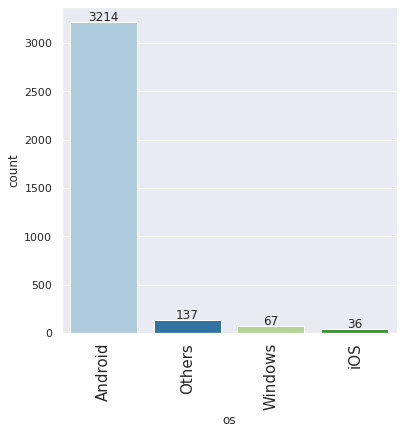

In [ ]:
labeled_barplot(udd1, 'os')

#### Observations

- Android is the most OS used by the devices
- Approximately 93% of all devices used Android OS

####4g

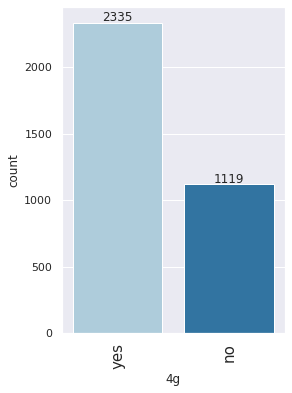

In [ ]:
labeled_barplot(udd1, '4g')

#### Observations

- 2335 devices have 4g

####5g

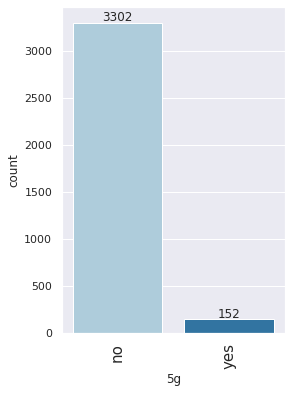

In [ ]:
labeled_barplot(udd1, '5g')

#### Observations

- 152 devices have 5g

###Bivariate Analysis

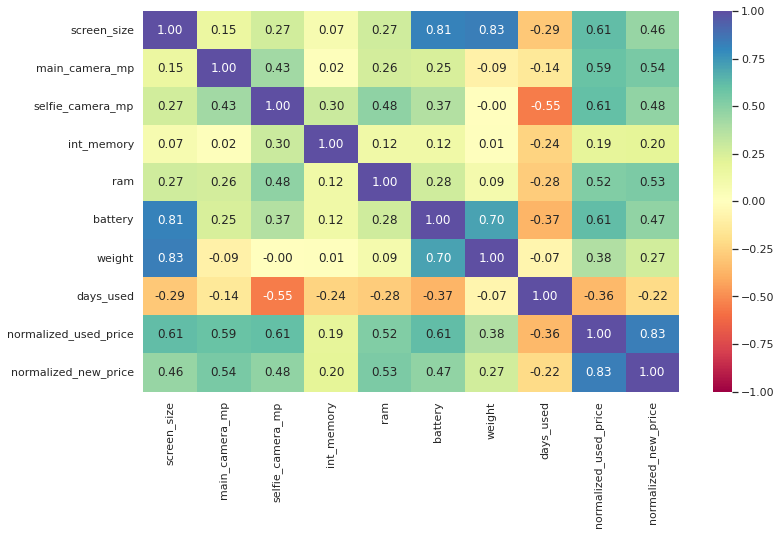

In [ ]:

num_cols = udd1.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('release_year')

plt.figure(figsize=(12, 7))
sns.heatmap(
    udd1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations

- There is very strong correllation between normalized used price and normalized new price 0.83

- similary strong correllation between screen size and weight of the device 0.83



In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=udd1, x='os', y='ram', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 1800x1080 with 0 Axes>

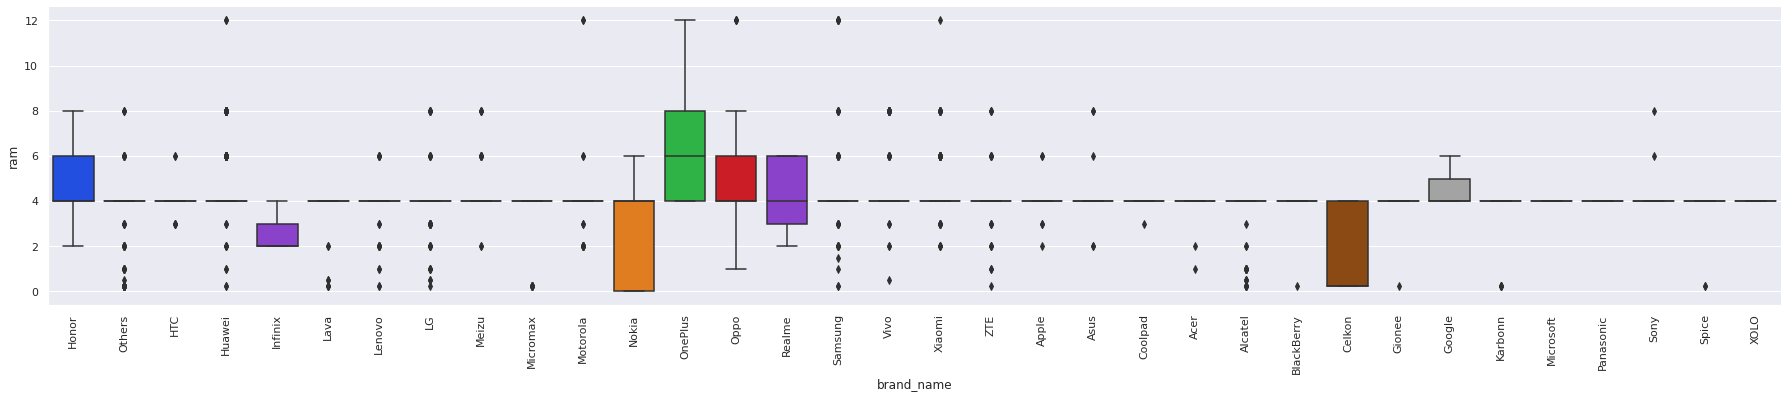

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=udd1, x='brand_name', y='ram', kind='box',palette ='bright',legend_out=True, aspect=5)
plt.xticks(rotation=90)
plt.show()

#### Observations

- The median RAM accross the brands seems to be approximately the same 4GB

- All 5g devices have higher median Ram size

In [ ]:
uddlbat = udd1[udd1.battery > 4500]
uddlbat.shape

(341, 15)

<Figure size 1440x720 with 0 Axes>

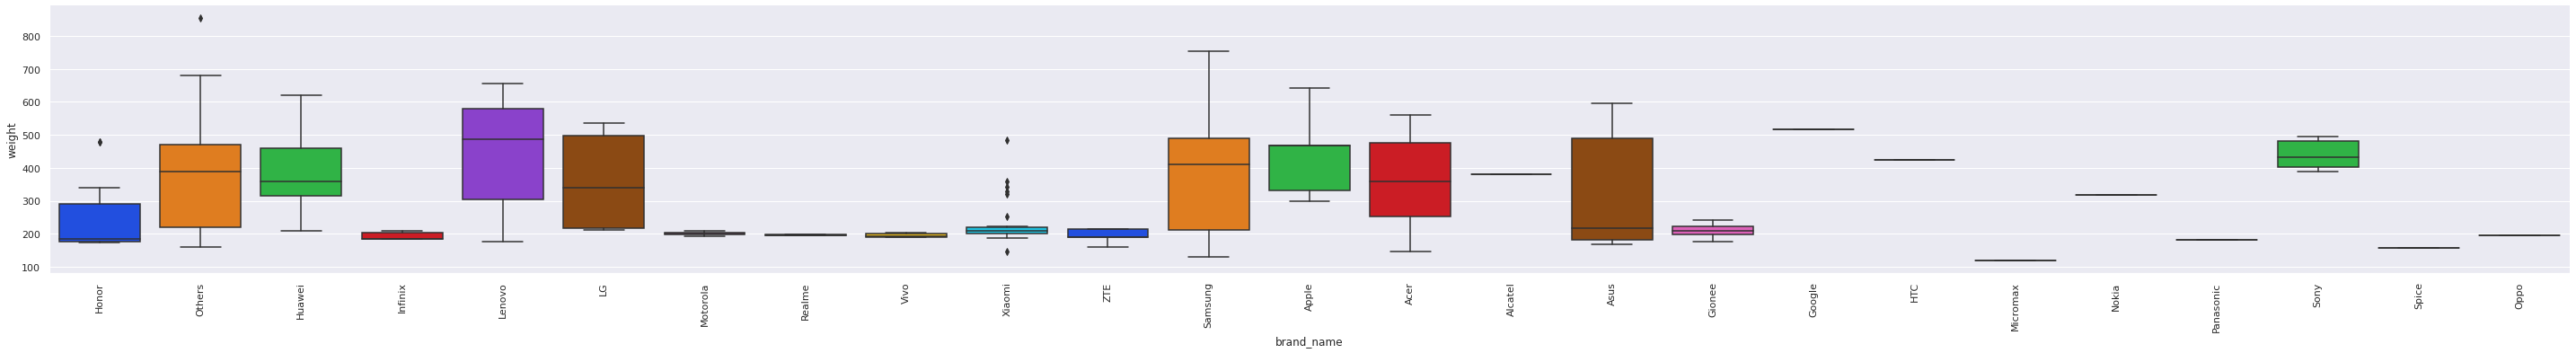

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(data=uddlbat, x='brand_name', y='weight', kind='box',palette ='bright',legend_out=True, aspect=8)
plt.xticks(rotation=90)
plt.show()



> Lenovo have highest median weight approximately 500grams, Huawei with median weight of approximately 350grams, sumsung with median weight of approximately 400grams



###**Observations**:

1. The distribution of normalized used device prices look more like **normal**

2. The percentage of the used device market is dominated by Android devices 93% approximatley

3. The median RAM accross the brands seems to be approximately the same 4GB

4. Lenovo have highest median weight approximately 500grams, Huawei with median weight of approximately 350grams, sumsung with median weight of approximately 400grams

5. 1,099 of phones and tablets are available across different brands with a screen size larger than 6 inches

6. Huawei, Vivo, oppo, Xiaomi and Sumsung are the top five brands with highest number of devices with selfie camera greater than 8mp

7. the attributes that are highly correlated with the normalized price of a used device include normalized price of a new device with score of 0.83, the battery capacity, selfie camera and screen size of the device with scores of 0.61 each and main camera 0.59

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###Missing value treatment

In [ ]:
udd1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

since all columns with missing values are numerical, will decide to replace them with their median values

In [ ]:
udd1.median()

<ipython-input-8-53e721ec9ccb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  udd1.median()


screen_size                12.830000
main_camera_mp              8.000000
selfie_camera_mp            5.000000
int_memory                 32.000000
ram                         4.000000
battery                  3000.000000
weight                    160.000000
release_year             2015.500000
days_used                 690.500000
normalized_used_price       4.405133
normalized_new_price        5.245892
dtype: float64

In [ ]:


udd1['main_camera_mp'] = udd1['main_camera_mp'].fillna(value=udd1['main_camera_mp'].median())

udd1['selfie_camera_mp'] = udd1['selfie_camera_mp'].fillna(value=udd1['selfie_camera_mp'].median())

udd1['int_memory'] = udd1['int_memory'].fillna(value=udd1['int_memory'].median())

udd1['ram'] = udd1['ram'].fillna(value=udd1['ram'].median())

udd1['battery'] = udd1['battery'].fillna(value=udd1['battery'].median())

udd1['weight'] = udd1['weight'].fillna(value=udd1['weight'].median())

In [ ]:
udd1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

###Feature engineering

In [ ]:
udd1['no_of_years'] = 2021 - udd1['release_year']
udd1.drop('release_year', axis=1, inplace=True)
udd1['no_of_years'].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: no_of_years, dtype: float64

#### Outlier Detection

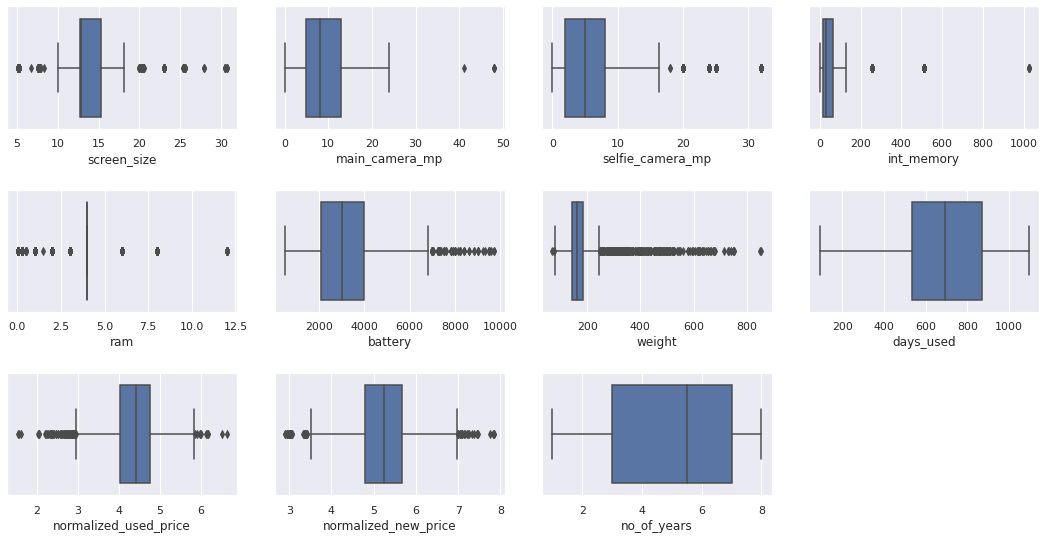

In [ ]:
num_cols = udd1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=udd1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

> - There are no outliers in data for released year and days used
- There are few outliers in the data for main camera, selfie camera and internal memory
- screen size, ram, battery, weight, normalized used price and normalized new price, however since these are all proper values, they will not be treated.




###Further processing of data




> - Will prefer to drop the columns `brand name`, since it contain text and too many unique values

In [ ]:
udd1.drop(['brand_name'], axis=1, inplace=True)
udd1.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,no_of_years
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


In [ ]:
udd1['os'].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

In [ ]:
udd1['os'].value_counts(normalize=True)

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

> From above I noticed there are 4% of devices with other 'OS', this will make it difficult to interprate since we cannot assign its values to any specific device.



In [ ]:
udd2=udd1[udd1['os']!='Others']

In [ ]:
udd2.shape

(3317, 14)

In [ ]:
udd2['os'].unique()

array(['Android', 'iOS', 'Windows'], dtype=object)

## EDA

- It is a good idea to explore the data once again after manipulating it.

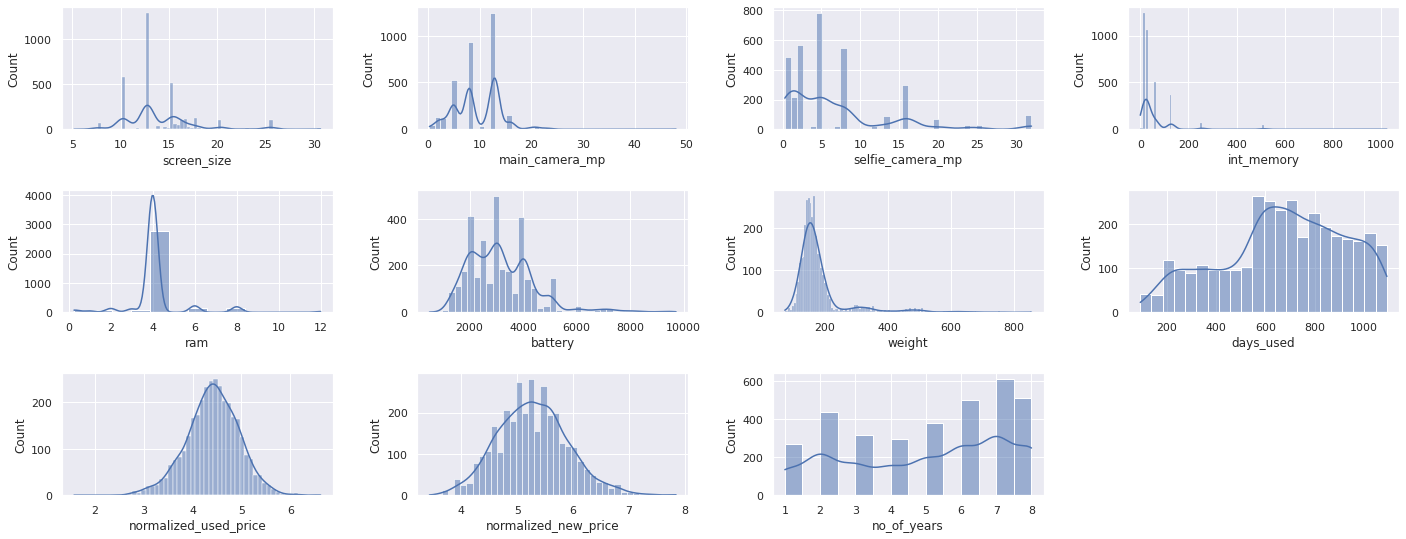

In [ ]:
num_cols = udd2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(udd2,x=udd2[variable],kde=True)
    plt.tight_layout(pad=2)

plt.show()



> After droping columns and further engineering, the distribution of various variables remains the same



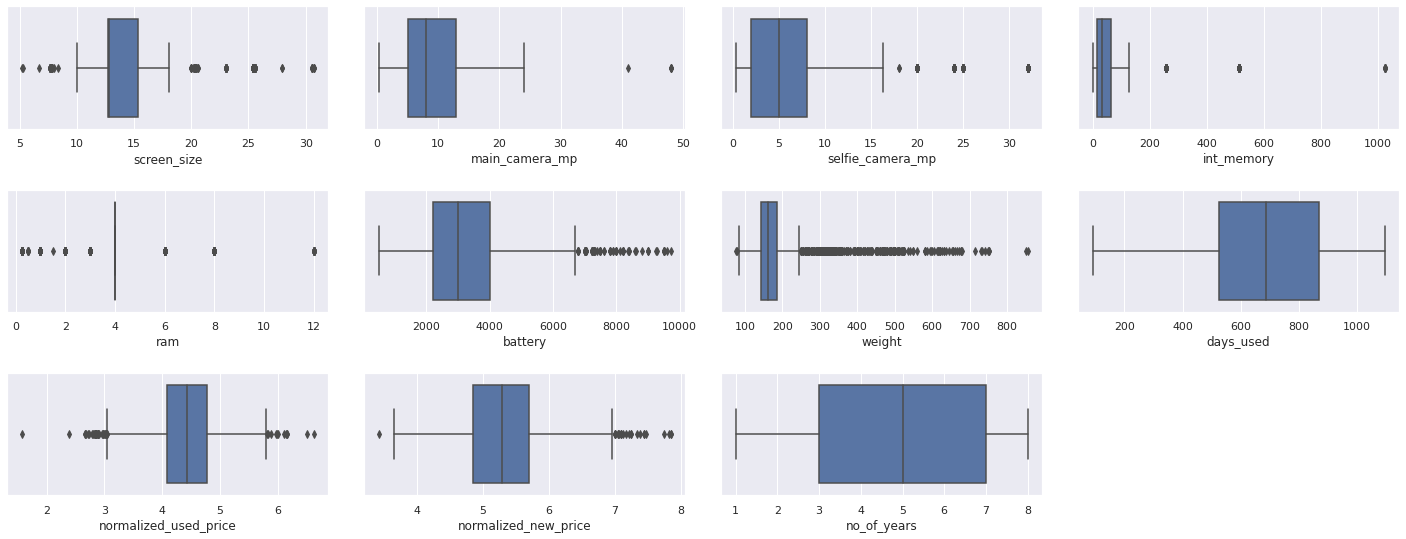

In [ ]:
num_cols = udd2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=udd2, x=variable)
    plt.tight_layout(pad=2)

plt.show()


> After droping columns and further engineering, the distribution of various variables remains the same

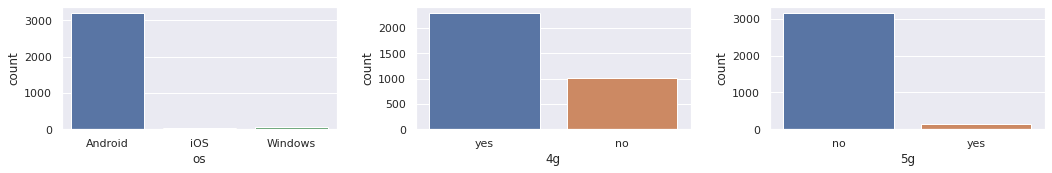

In [ ]:
cat_cols = udd2.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(20, 10))

for i, variable in enumerate(cat_cols):
    plt.subplot(4, 4, i + 1)
    sns.countplot(data=udd2, x=udd2[variable])
    plt.tight_layout(pad=2)

plt.show()

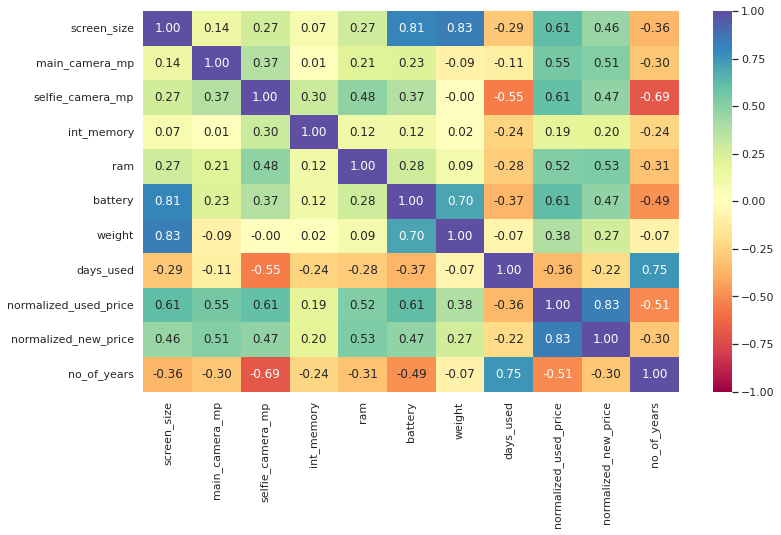

In [ ]:
num_cols = udd2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    udd1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

###Data Preparation for Modeling



> - We aer going to build a model to predict the normalized price of used devices
- we will have to create dummy variables for the categorical values
- Data needs to be splited into train and test to enable evaluation of the model that will be built
- Linear Regression model will be build using the train data and then check it's performance



In [ ]:
#Splitting into dependent and independent variables
X = udd2.drop(['normalized_used_price'], axis=1)
y = udd2['normalized_used_price']


In [ ]:
print(X.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        25.50  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   7250.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   no_of_years  
0            1  
1            1  
2            1  
3            1  
4            1  


In [ ]:
print(y.head())

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64


In [ ]:
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,no_of_years,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,0,0,1,0


In [ ]:
#Splitting the data in 70:30 ratio for train and test data respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print('Number of rows in train data is', x_train.shape[0])
print('Number of rows in test data is', x_test.shape[0])

Number of rows in train data is 2321
Number of rows in test data is 996


## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.826
Model:                               OLS   Adj. R-squared:                  0.825
Method:                    Least Squares   F-statistic:                     779.9
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           13:36:49   Log-Likelihood:                 168.04
No. Observations:                   2321   AIC:                            -306.1
Df Residuals:                       2306   BIC:                            -219.8
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

###Interpreting the Regression Results:

1. **R-squared** value of 0.826 indicates a good model, this reflects how fit  the model is, R-squared values ranges from o to 1.
    - However will have to check if all conditions are met.
   

2. ***const* coef** of 1.4594 is the Y-intercept of the model.
    - This implies if all other predictor variable coefficients are zero, then the expected output dependent variable Y would be equal to the *const* coefficient.
   


3. **Coef of a predictor variable** represents the unit change in the output Y due to a change in the predictor variable, all other factors held constant.
    - for example coefficient for 'screen size' is **0.0242**, 'main_camera_mp' is **0.0219** etc.

## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.225071,0.177522,0.825623,0.824488,4.155898


In [ ]:
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.224037,0.176227,0.822473,0.819756,4.134433


**Observations**

- The training $R^2$ is 0.8256, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict normalized used price within a mean error of 0.176 on the test data

- MAPE of 4.1344 on the test data means that we are able to predict within 4.13% of the normalized used price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **Homoscedasticity**

### Testing for Multicollinearity

**General Rule of thumb**:

    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,132.687916
1,screen_size,6.007001
2,main_camera_mp,1.739385
3,selfie_camera_mp,2.687444
4,int_memory,1.212300
5,ram,2.083334
6,battery,3.606739
7,weight,5.274650
8,days_used,2.596932
9,normalized_new_price,2.377196


* screen size and weight of device are the only columns with VIF values slightly above 5, they are 6 and 5.27465 respectively

#### Treating multicollinearity

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['screen_size', 'weight']

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.821052,0.228051
1,screen_size,0.820504,0.228400


In [ ]:
col_to_drop = 'weight'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,115.796288
1,screen_size,2.952080
2,main_camera_mp,1.690157
3,selfie_camera_mp,2.648024
4,int_memory,1.211956
5,ram,2.080101
6,battery,3.298865
7,days_used,2.584279
8,normalized_new_price,2.374424
9,no_of_years,4.671510


In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.822
Model:                               OLS   Adj. R-squared:                  0.821
Method:                    Least Squares   F-statistic:                     819.8
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           13:48:44   Log-Likelihood:                 144.53
No. Observations:                   2321   AIC:                            -261.1
Df Residuals:                       2307   BIC:                            -180.6
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observations**

- We can see that adj. R-squared has dropped from 0.825 to 0.821, which shows that the dropped columns did not have much effect on the model

### Dealing with high p-value variables

- Since multicollinearity resolved, will look at the p-values of predictor variables to check their significance

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'normalized_new_price', 'no_of_years', '4g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.821
Model:                               OLS   Adj. R-squared:                  0.821
Method:                    Least Squares   F-statistic:                     1518.
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           13:51:56   Log-Likelihood:                 139.26
No. Observations:                   2321   AIC:                            -262.5
Df Residuals:                       2313   BIC:                            -216.5
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227879,0.179442,0.821244,0.820626,4.198631


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.226698,0.178,0.818231,0.816757,4.170757


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.817, which means the model is able to explain ~82% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.821
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

###Checking linearity of variables & independence of error terms

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
2266,3.922369,3.838197,0.084173
1713,4.410978,4.442493,-0.031515
238,4.539991,4.875579,-0.335588
1370,4.802380,4.498344,0.304036
1630,3.983599,3.788294,0.195305


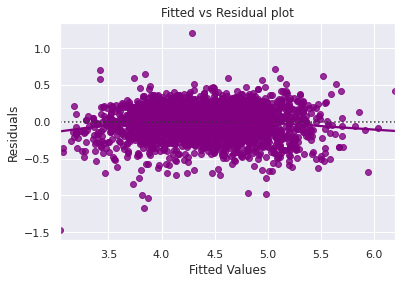

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* **Since we see no pattern in the plot above, the assumptions of linearity and independence are satisfied.**

###Testing for normality of error terms

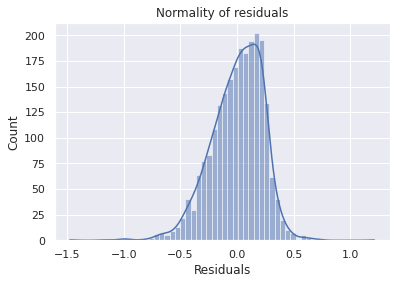

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()



> - The histogram of residuals does have a bell shape.



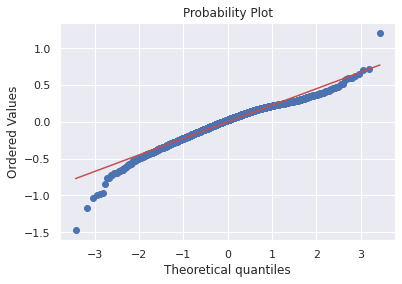

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()



> - The residuals more or less follow a straight line except for the tails.



Checking for normality using the Shapiro-Wilk test.

    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9714071750640869, pvalue=4.068229752797427e-21)

- Since p-value < 0.05, the residuals are not normally distributed as per the Shapiro-Wilk test.
- However, as an approximation, we can accept this distribution as close to being normally distributed.
- **So, the assumption is satisfied.**

### Testing for homoscedasticity


* The goldfeldquandt test can be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity


In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0835848663420582), ('p-value', 0.08657634730580543)]

**Since p-value of 0.086576 > 0.05, we can say that the residuals are homoscedastic. So this assumption is satisfied.**

### Predicted values

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
754,4.309590,4.685414
472,3.952589,4.366481
1432,3.181382,3.380419
635,4.082778,3.876974
2834,4.880299,5.004795
517,3.927699,3.822178
854,3.903991,4.009524
2700,4.703657,4.702505
224,4.466598,4.591419
1681,4.493568,4.278517


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

> Recreating the final model and print it's summary to gain insights



In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.821
Model:                               OLS   Adj. R-squared:                  0.821
Method:                    Least Squares   F-statistic:                     1518.
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           14:01:17   Log-Likelihood:                 139.26
No. Observations:                   2321   AIC:                            -262.5
Df Residuals:                       2313   BIC:                            -216.5
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227879,0.179442,0.821244,0.820626,4.198631


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.226698,0.178,0.818231,0.816757,4.170757


* The model is able to explain ~82% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.2% of the normalized used price.

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

1. The model is able to explain ~82% of the variation in the data and within 4.2% of the normalized used price on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes


2. If the screen size of device increases by one unit, then its normalized used price increases by 0.0428 units, all other variables remaining constant


3. If the main camera of the device increases by one unit, then its normalized used price will increases by 0.0207 units, all other variables remaining constant


4. If the selfie camera of the device increases by one unit, then its normalized used price will increases by 0.0132 units, all other variables remaining constant


5. If the ram of the device increase by one unit, then its normalized used price will increase by 0.0273 units, all other variables remaining constant

6. If the normalized new price of the device increase by one unit, then its normalized used price will increase by 0.4009, all other variables remaining constant

7. If the number of years of the device increase by one unit, then its normalized used price will decrease by 0.0175, all other variables remaining constant

8. If the internet speed of device increase by one unit, then its normalized used price will increase by  0.0510  



*   With coefficient of 0.4009 normalized new price is the variable with the highest influence per unit, this means the higher the cost of the device the higher will be the normalized used price, however at the same time the older the same device the lesser the normalized used price by 0.0175 per unit increase in years.



*   Recell need to collect datat about customers, their age, incomes, location, device prefference etc, this will help them target customers with device specific pricing based on age and income.



___